### Generate samples using a variable gender input
Rather than just taking 0 or 1 for gender, allow a float input so we can slide

In [1]:
# needs to run in the fader-networks branch
# (that's also where all the checkpoints are)
import os
os.chdir('/home/ubuntu/msc-project-fader-networks/')

import notebook_utils as nu

/usr/local/lib/python2.7/dist-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim

from model import Loop, MaskedMSE

from utils import generate_merlin_wav

from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

from IPython.display import Audio
import IPython.display

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import training_monitor as tm
import model_discriminator as md

In [7]:
os.getcwd()

'/home/ubuntu/msc-project-fader-networks'

In [8]:
checkpoint = 'checkpoints/fader_gender_concat_baseline163_20180720/epoch_181.pth'
discriminator_checkpoint = 'checkpoints/fader_gender_concat_baseline163_20180720/discriminator_epoch_181.pth'

In [9]:
start_epoch = 1

checkpoint_args_path = os.path.dirname(checkpoint) + '/args.pth'
checkpoint_args = torch.load(checkpoint_args_path)

In [10]:
start_epoch = checkpoint_args[3]
model = Loop(checkpoint_args[0])
model.cuda()

In [11]:
model.encoder.lut_s

Embedding(107, 254, max_norm=1.0)

In [12]:
model.load_state_dict(torch.load(checkpoint, map_location=lambda storage, loc: storage))

In [13]:
criterion = MaskedMSE().cuda()

speaker_info = md.get_speaker_info_for_discriminator()

In [14]:
embeddings = model.encoder.lut_s.weight.cpu().data.numpy()

In [1156]:
# generate the sample
spkr_id = 33
sentence_id = 307
# (33, 196, 201, 209)
# (34, 217)
# (45, 295)
# (55, 307)
#spkr_id, sentence_id = (34, 217)
#spkr_id, sentence_id = (45, 295) # good: most important thing... M scot
#spkr_id, sentence_id = (88, 105)
#spkr_id, sentence_id = (99, 115)
spkr_id, sentence_id = (6, 104) # good: what kind of man does that..., F Irish
spkr_id, sentence_id = (26, 104) # okay: that would be unlawful, F Welsh
spkr_id, sentence_id = (29, 104) # journalists..., M Birmingham, attention fails
spkr_id, sentence_id = (77, 250) # I would urge the government to think again, F Am, only okay
spkr_id, sentence_id = (88, 150) # attention fails
spkr_id, sentence_id = (89, 150) # the scots are great, F Am, not great
spkr_id, sentence_id = (90, 150) # why is that, M Am, not great
spkr_id, sentence_id = (91, 150) # the pilot was making a visual approach, F Nz, not great although accent seems preserved
spkr_id, sentence_id = (92, 150) # it's good for the city, F SA, doesn't capture the accent so well (limited data)
spkr_id, sentence_id = (94, 155) # this is a recipe for (long) 'disaster', F Ir, pretty good
spkr_id, sentence_id = (95, 155) # we would welcome a great emphasis... F Am, accent okay but attention poor
spkr_id, sentence_id = (95, 160) # you shouldn't have a stoppage... F Am, attention poor
spkr_id, sentence_id = (95, 195) # felt good about it, F Am, reasonable
spkr_id, sentence_id = (95, 203) # their expressions only reflected those of the audience, F Am, poor attention in middle but [1,0], [0,1] okay
spkr_id, sentence_id = (96, 160) # it had been played at festivals, F Ca, quite a good one
spkr_id, sentence_id = (96, 279) # we are talking about one family, F Ca, pretty good

#spkr_id, sentence_id = (70, 137) # we are very concerned about controller fatigue, M Ca, okay
#spkr_id, sentence_id = (70, 140) # how much of a cop out is that, M Ca, not great
#spkr_id, sentence_id = (79, 419) # there was no pressure at all, F Ca, okay
#spkr_id, sentence_id = (66, 396) # the woman is basically off her head, M Ir, okay-ish
#spkr_id, sentence_id = (66, 329) # I feel sorry for the reds, M Ir, okay-ish

#spkr_id, sentence_id = (6, 108) # before the game we went for a pint, F Eng, quite good!

# samples for Simon King
# 272: scottish male
spkr_id, sentence_id = (45, 295) # good: most important thing... M scot
spkr_id, sentence_id = (45, 13) # 
spkr_id, sentence_id = (45, 44) # 
spkr_id, sentence_id = (45, 68) # 
spkr_id, sentence_id = (45, 80) #
spkr_id, sentence_id = (45, 353) #
spkr_id, sentence_id = (45, 374) #
spkr_id, sentence_id = (45, 324) #

# 231: F Eng
spkr_id, sentence_id = (6, 108)
spkr_id, sentence_id = (6, 120)
spkr_id, sentence_id = (6, 152)
spkr_id, sentence_id = (6, 183)
spkr_id, sentence_id = (6, 233)

# 253: F Welsh
spkr_id, sentence_id = (26, 104)
spkr_id, sentence_id = (26, 191)
spkr_id, sentence_id = (26, 212)

# 343: F Canadian
spkr_id, sentence_id = (96, 160)
spkr_id, sentence_id = (96, 333)
spkr_id, sentence_id = (96, 350)

# 298: M Irish
spkr_id, sentence_id = (66, 329)
spkr_id, sentence_id = (66, 137)
spkr_id, sentence_id = (66, 235)
spkr_id, sentence_id = (66, 262)

# 294: F Am
spkr_id, sentence_id = (63, 64)
spkr_id, sentence_id = (63, 86)
spkr_id, sentence_id = (63, 372)

#text = 'The threats would be a major escalation of the dispute and sparked further falls on stock markets.'
text = 'China responded by accusing the US of blackmail'
text = 'How trying to stay cool could make the world even hotter'
text = "The question on the lips of every England fan"
text = 'either a tomato or a schedule in progress'
npz = "p%d_%d.npz" % (speaker_info.loc[spkr_id].id, sentence_id)
npz = "p%d_%03d.npz" % (speaker_info.loc[spkr_id].id, sentence_id)
#'{num:03d}'.format(num=sample_id)
#speaker_info[speaker_info.id == 294]
#npz = ''

speaker_info[spkr_id:spkr_id+1]

,id,age,gender,accents,region
63,294,33,F,American,San Francisco


In [1157]:
npz_path='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all/numpy_features'
output_dir='./'
norm_path = '/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all/norm_info/norm.dat'

txt, feat, pre_calc_feat = nu.npy_loader_phonemes(os.path.join(npz_path, npz))

txt = Variable(txt.unsqueeze(1), volatile=True)
feat = Variable(feat.unsqueeze(1), volatile=True)
spkr = Variable(torch.LongTensor([spkr_id]), volatile=True)

output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id)

txt = txt.cuda()
feat = feat.cuda()
spkr = spkr.cuda()
model.train() #! teacher forcing
model.noise=0 #! no noise
model.eval()
print ''

In [1145]:
# linear mixing
gender_sweep = [[1, 0], [0, 1]]
plt_title = 'test'

In [1160]:
# no mixing
gender_sweep = [[2, 0], [1.5, 0], [1.0, 0], [0.5, 0], [0, 0], [0, 0.5], [0, 1.0], [0, 1.5], [0, 2.0]]
plt_title = 'Extreme Values (No Mixing)'

In [1166]:
# linear mixing
gender_sweep = [[1, 0], [0.8, 0.2], [0.6, 0.4], [0.5, 0.5], [0.4, 0.6], [0.2, 0.8], [0, 1]]
plt_title = 'Linear Mixture'

In [236]:
# Various strange cases
gender_sweep = [[5, 0], [-1, 0], [0, -1], [0, 5], [1, 1], [2, 2]]
plt_title = 'Strange Values'

In [237]:
gender_sweep

[[5, 0], [-1, 0], [0, -1], [0, 5], [1, 1], [2, 2]]

In [1167]:
#gender = np.array(0).reshape(-1)
#gender = np.array([-1, 0]).reshape(1,2)
all_feat = []

output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_orig'
generate_merlin_wav(feat.data.cpu().numpy(),
                    output_dir,
                    output_file,
                    norm_path)

for g in gender_sweep:
    output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_gender_concat_' + str(g[0]) + "_" + str(g[1]) 
    gender = np.array(g).reshape(1,2)
    loop_feat, attn = model([txt, spkr, gender], feat)
    loop_feat, attn = nu.trim_pred(loop_feat, attn)    
    
    generate_merlin_wav(loop_feat.data.cpu().numpy(),
                        output_dir,
                        output_file,
                        norm_path)
    
    all_feat.append(loop_feat.data.cpu().numpy())
        

complete p294_372_63_orig.wav.
complete p294_372_63_gender_concat_1_0.wav.
complete p294_372_63_gender_concat_0.8_0.2.wav.
complete p294_372_63_gender_concat_0.6_0.4.wav.
complete p294_372_63_gender_concat_0.5_0.5.wav.
complete p294_372_63_gender_concat_0.4_0.6.wav.
complete p294_372_63_gender_concat_0.2_0.8.wav.
complete p294_372_63_gender_concat_0_1.wav.


In [1168]:
print 'Orig'
output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_orig'
IPython.display.display(Audio(output_file + '.wav', autoplay=False))

for g in gender_sweep:
    output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_gender_concat_' + str(g[0]) + "_" + str(g[1])   
    print g
    IPython.display.display(Audio(output_file + '.wav', autoplay=False))

Orig


[1, 0]


[0.8, 0.2]


[0.6, 0.4]


[0.5, 0.5]


[0.4, 0.6]


[0.2, 0.8]


[0, 1]


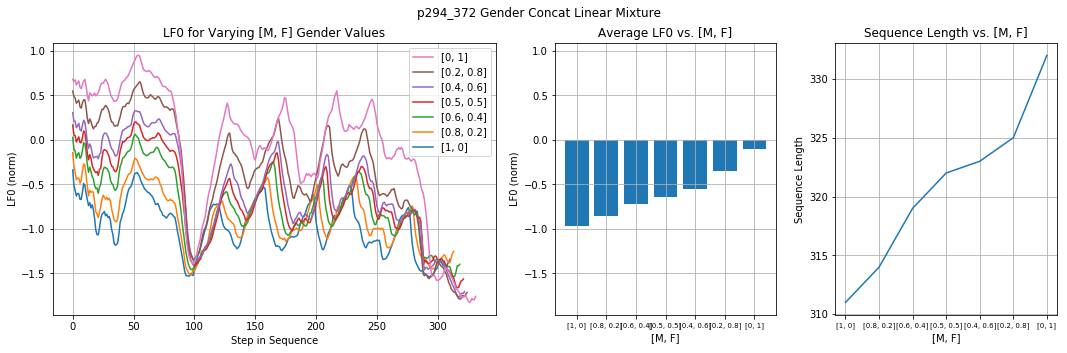

In [1169]:
#fig = plt.figure(figsize=(14,4))
#ax = fig.add_subplot(1, 3, gridspec_kw = {'width_ratios':[3, 1, 1]})
f, (ax, a1, a2) = plt.subplots(1, 3, gridspec_kw = {'width_ratios':[2, 1, 1]}, figsize=(18,5))

for i, g in enumerate(gender_sweep):
    #ax.plot(np.exp(all_feat[i][:,:,61]), label=g)
    ax.plot(all_feat[i][:,:,61], label=g)
    
#ax.legend(gender_sweep)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper right')  # reverse to keep order consistent
ax.set_ylabel('LF0 (norm)')
ax.set_xlabel('Step in Sequence')
yl = ax.get_ylim()
ax.set_title('LF0 for Varying [M, F] Gender Values')
ax.grid(True)

#plt.subplot(1,2,2)
a1.bar(range(len(gender_sweep)), [f[:,:,61].mean() for f in all_feat])
a1.set_ylabel('LF0 (norm)')
a1.set_ylim(yl)
a1.set_xticks(range(len(gender_sweep)))
a1.set_xticklabels(gender_sweep)
a1.tick_params(axis='x', which='major', labelsize=7)
a1.set_title('Average LF0 vs. [M, F]')
a1.set_xlabel('[M, F]')
a1.grid(True)

a2.plot(range(len(all_feat)), [f.shape[0] for f in all_feat])
a2.grid(True)
a2.set_ylabel('Sequence Length')
a2.set_xticks(range(len(gender_sweep)))
a2.set_xticklabels(gender_sweep)
a2.tick_params(axis='x', which='major', labelsize=7)
a2.set_xlabel('[M, F]')
a2.set_title('Sequence Length vs. [M, F]')

plt.suptitle(npz[:-4] + ' Gender Concat ' + plt_title)

#plt.tight_layout()

plt.savefig('lf0_' + npz[:-4] + '_' + (plt_title.replace(' ', '_')).replace('(', '').replace(')', ''))

plt.show()

### Manually modify other variables in the embedding

In [1176]:
output_file = 'ident_test_base'
gender = np.array([1, 0]).reshape(1,2)
this_embedding = embeddings[spkr_id, :].copy()

In [1177]:
spkr_ident = Variable(torch.from_numpy(this_embedding), volatile=True).view(-1, 254).cuda()
loop_feat, attn = model([txt, spkr_ident, gender], feat)
loop_feat, attn = nu.trim_pred(loop_feat, attn)    

generate_merlin_wav(loop_feat.data.cpu().numpy(),
                    output_dir,
                    output_file,
                    norm_path)

loop_feat_base = loop_feat.data.cpu().numpy().copy()

complete ident_test_base.wav.


Now hack the embedding...

In [1178]:
this_embedding[251] = -1.5

In [1179]:
type(this_embedding)

numpy.ndarray

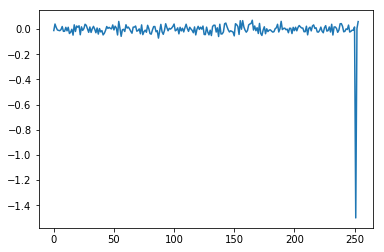

In [1180]:
plt.plot(this_embedding)

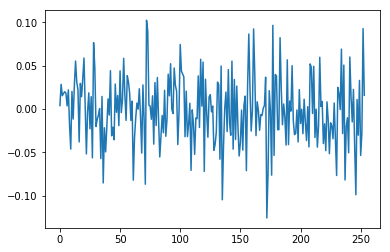

In [1181]:
#e = np.random.randn(254).astype(np.single)*0.04
e = np.random.randn(254).astype(np.single)*0.04
plt.plot(e)
this_embedding = e
gender = np.array([1, 0]).reshape(1,2)

In [1182]:
this_embedding = embeddings[spkr_id, :].copy()


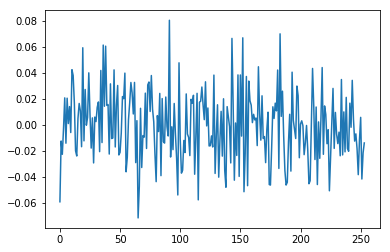

In [1183]:
np.random.shuffle(this_embedding)
plt.plot(this_embedding)

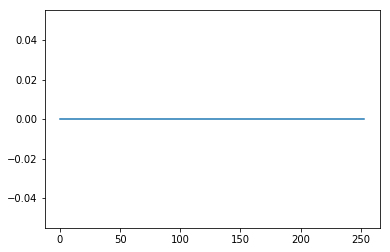

In [1184]:
this_embedding = np.zeros_like(this_embedding)
plt.plot(this_embedding)

In [1185]:
output_file_hack = 'ident_test_hack'
spkr_ident = Variable(torch.from_numpy(this_embedding), volatile=True).view(-1, 254).cuda()
loop_feat, attn = model([txt, spkr_ident, gender], feat)
loop_feat, attn = nu.trim_pred(loop_feat, attn)    

generate_merlin_wav(loop_feat.data.cpu().numpy(),
                    output_dir,
                    output_file_hack,
                    norm_path)

loop_feat_hack = loop_feat.data.cpu().numpy().copy()

complete ident_test_hack.wav.


In [1186]:
# original
IPython.display.display(Audio(output_file + '.wav', autoplay=False))

In [1187]:
# hack
IPython.display.display(Audio(output_file_hack + '.wav', autoplay=False))

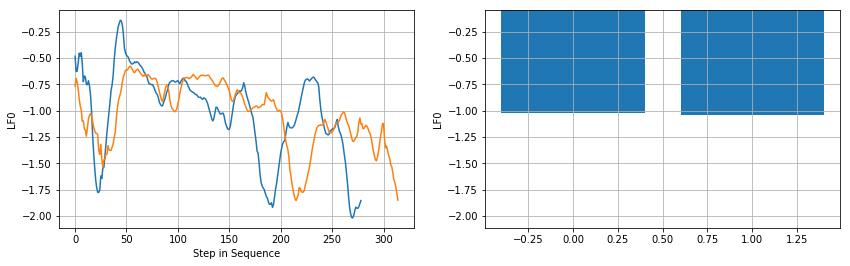

In [334]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)

plt.plot(loop_feat_base[:,:,61])
plt.plot(loop_feat_hack[:,:,61])
  
plt.ylabel('LF0')
plt.xlabel('Step in Sequence')
yl = plt.gca().get_ylim()
plt.grid(True)

plt.subplot(1,2,2)
plt.bar(range(2), [loop_feat_base[:,:,61].mean(), loop_feat_hack[:,:,61].mean()])
plt.ylabel('LF0')
plt.gca().set_ylim(yl)
#plt.gca().set_xticks(range(len(gender_sweep)))
#plt.gca().set_xticklabels(gender_sweep)
plt.grid(True)

plt.show()

<Container object of 107 artists>

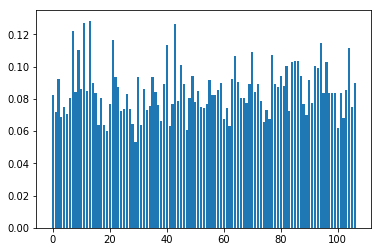

In [150]:
plt.bar(range(107), embeddings.max(1))

In [167]:
np.sqrt((embeddings**2).sum(1))

array([ 0.4682464 ,  0.42671731,  0.46093211,  0.40022862,  0.45531157,
        0.40920681,  0.48464695,  0.5012576 ,  0.49522072,  0.47051314,
        0.50070959,  0.54947346,  0.44274837,  0.5066008 ,  0.4538644 ,
        0.47022191,  0.43102688,  0.45956731,  0.44515884,  0.40184847,
        0.47884598,  0.45006588,  0.44563988,  0.48150304,  0.43550909,
        0.49432072,  0.48804322,  0.4716121 ,  0.43045598,  0.43380484,
        0.46830985,  0.46266299,  0.45942551,  0.43944609,  0.48482946,
        0.44646075,  0.48056361,  0.45655152,  0.40762678,  0.49537662,
        0.46703511,  0.40890437,  0.43236458,  0.45225167,  0.41650292,
        0.47329414,  0.49414185,  0.42645949,  0.44140118,  0.42498726,
        0.45295155,  0.48975897,  0.48389879,  0.45436782,  0.41995576,
        0.49251851,  0.44772777,  0.51434088,  0.45597517,  0.48368904,
        0.43564114,  0.49734053,  0.42803094,  0.5226891 ,  0.44307962,
        0.42485866,  0.42901555,  0.50004798,  0.45449114,  0.43

### Sweep other variables in the space

In [1175]:
# useful example of rising/falling intonation
spkr_id, sentence_id = (66, 329) 
gender = np.array([0, 1]).reshape(1,2)
idx_to_sweep = 100 # 100 appears to be some kind of intonation: rising pitch vs. falling pitch
sweep_vals = [-0.6, -0.5, -0.25, 0, 0.25, 0.5, +0.6]

In [ ]:
# nice example: clear at the start, less so as the utterance proceeds
spkr_id, sentence_id = (6, 104) # good: what kind of man does that..., F Eng
gender = np.array([1, 0]).reshape(1,2) #  i.e. swapped!
idx_to_sweep = 100 # 100 appears to be some kind of intonation: rising pitch vs. falling pitch
sweep_vals = [-0.6, -0.5, -0.25, 0, 0.25, 0.5, +0.6]

In [374]:
idx_to_sweep = 100 # 100 appears to be some kind of intonation: rising pitch vs. falling pitch
sweep_vals = [-0.6, -0.5, -0.25, 0, 0.25, 0.5, +0.6]
gender = np.array([0, 1]).reshape(1,2)

In [1174]:
all_feat = []

output_file = 'ident_test_base'

output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_orig'
generate_merlin_wav(feat.data.cpu().numpy(),
                    output_dir,
                    output_file,
                    norm_path)
loop_feat_base = loop_feat.data.cpu().numpy().copy()

for g in sweep_vals:
    output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_gender_concat_varsweep_' + str(idx_to_sweep)  + '_' + str(g)
    this_embedding = embeddings[spkr_id, :].copy()
    this_embedding[idx_to_sweep] = g
    spkr_ident = Variable(torch.from_numpy(this_embedding), volatile=True).view(-1, 254).cuda()
    
    loop_feat, attn = model([txt, spkr_ident, gender], feat)
    loop_feat, attn = nu.trim_pred(loop_feat, attn)    
    
    generate_merlin_wav(loop_feat.data.cpu().numpy(),
                        output_dir,
                        output_file,
                        norm_path)
    
    all_feat.append(loop_feat.data.cpu().numpy())    
        

complete p294_372_66_orig.wav.
complete p294_372_66_gender_concat_varsweep_100_-0.6.wav.
complete p294_372_66_gender_concat_varsweep_100_-0.5.wav.
complete p294_372_66_gender_concat_varsweep_100_-0.25.wav.
complete p294_372_66_gender_concat_varsweep_100_0.wav.
complete p294_372_66_gender_concat_varsweep_100_0.25.wav.
complete p294_372_66_gender_concat_varsweep_100_0.5.wav.
complete p294_372_66_gender_concat_varsweep_100_0.6.wav.


In [1172]:
print 'Orig'
output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_orig'
IPython.display.display(Audio(output_file + '.wav', autoplay=False))

for g in sweep_vals:    
    output_file = os.path.basename(npz)[:-4] + '_' + str(spkr_id) + '_gender_concat_varsweep_' + str(idx_to_sweep)  + '_' + str(g)
    print g
    IPython.display.display(Audio(output_file + '.wav', autoplay=False))
    


Orig


-0.6


-0.5


-0.25


0


0.25


0.5


0.6


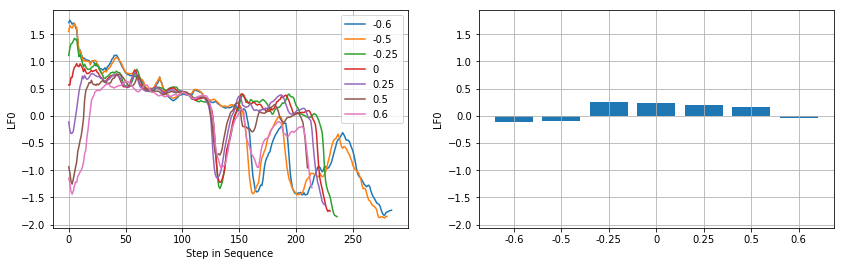

In [377]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)

for i, g in enumerate(sweep_vals):
    plt.plot(all_feat[i][:,:,61])
    
plt.legend(sweep_vals)
plt.ylabel('LF0')
plt.xlabel('Step in Sequence')
yl = plt.gca().get_ylim()
plt.grid(True)

plt.subplot(1,2,2)
plt.bar(range(len(sweep_vals)), [f[:,:,61].mean() for f in all_feat])
plt.ylabel('LF0')
plt.gca().set_ylim(yl)
plt.gca().set_xticks(range(len(sweep_vals)))
plt.gca().set_xticklabels(sweep_vals)
plt.grid(True)

plt.show()

In [399]:
embeddings[spkr_id, idx_to_sweep]

0.044572916